In [1]:
import sys
import os
sys.path.append(
    os.path.abspath("..")
)

In [2]:
# import necessary modules
from services.mmrs import MultiMediaRetrievalSystem
from services.data import DatasetLoader
from services.common import IRMethod
import json
import matplotlib.pyplot as plt
import random
import pandas as pd
from typing import *  # noqa: F403

In [3]:
dataset_loader: DatasetLoader = DatasetLoader("../dataset")

In [4]:
mmrs: MultiMediaRetrievalSystem = MultiMediaRetrievalSystem()
mmrs.prepare_data(
    dataset_loader.id_artist_song_album,
    dataset_loader.id_url,
    dataset_loader.id_genres,
    dataset_loader.id_metadata,
    dataset_loader.id_tags,
)

In [5]:
from services.metrics import MetricCalculator

metric_calculator = MetricCalculator(dataset_loader, mmrs)

def evaluate(
    sample_size: int,
    ir_method: IRMethod,
    N: int
) -> Any:
    cov = metric_calculator.compute_cov_at_n(ir_method, sample_size, N)
    div = metric_calculator.compute_div_at_n(ir_method, sample_size, N)
    pop = metric_calculator.compute_avg_pop_at_n(ir_method, sample_size, N)
    return cov, div, pop

In [18]:
SAMPLE_SIZE: int = len(dataset_loader.id_artist_song_album)
Ns = [10, 20, 30, 40, 50, 60, 100, 200]
results = {
    "cov": {},
    "div": {},
    "pop": {}
}
for ir_method in IRMethod:
    print(ir_method.value)
    results["cov"][ir_method.value] = {}
    results["div"][ir_method.value] = {}
    results["pop"][ir_method.value] = {}
    for N in Ns:
        cov, div, pop = evaluate(SAMPLE_SIZE, ir_method, N)
        results["cov"][ir_method.value][N] = [cov[0].item(), cov[1].item(), cov[2].item(), cov[3].item(), cov[4].item()]
        results["div"][ir_method.value][N] = [div[0].item(), div[1].item(), div[2].item(), div[3].item(), div[4].item()]
        results["pop"][ir_method.value][N] = [pop[0].item(), pop[1].item(), pop[2].item(), pop[3].item(), pop[4].item()]

with open("results.json", "w") as f:
    json.dump(results, f)

Baseline


5148it [00:28, 180.78it/s]
5148it [01:24, 60.80it/s]
5148it [00:31, 164.59it/s]
5148it [00:30, 171.17it/s]
5148it [02:00, 42.74it/s]
5148it [00:28, 179.45it/s]
5148it [00:29, 176.27it/s]
5148it [02:48, 30.62it/s]
5148it [00:29, 171.81it/s]
5148it [00:29, 177.42it/s]
5148it [03:13, 26.61it/s]
5148it [00:28, 181.41it/s]
5148it [00:28, 182.07it/s]
5148it [03:49, 22.48it/s]
5148it [00:28, 181.26it/s]
5148it [00:28, 180.75it/s]
5148it [04:30, 19.06it/s]
5148it [00:27, 184.42it/s]
5148it [00:28, 178.13it/s]
5148it [07:01, 12.20it/s]
5148it [00:28, 178.04it/s]
5148it [00:31, 163.98it/s]
5148it [13:28,  6.37it/s]
5148it [00:31, 164.14it/s]


TF-IDF


5148it [00:35, 144.84it/s]
5148it [01:21, 63.33it/s]
5148it [00:35, 145.19it/s]
5148it [00:36, 142.40it/s]
5148it [02:02, 42.06it/s]
5148it [00:35, 144.39it/s]
5148it [00:35, 143.29it/s]
5148it [02:41, 31.83it/s]
5148it [00:36, 142.87it/s]
5148it [00:36, 141.32it/s]
5148it [03:21, 25.51it/s]
5148it [00:36, 141.76it/s]
5148it [00:36, 139.92it/s]
5148it [03:58, 21.57it/s]
5148it [00:36, 140.92it/s]
5148it [00:36, 140.03it/s]
5148it [04:26, 19.33it/s]
5148it [00:37, 138.93it/s]
5148it [00:38, 135.16it/s]
5148it [07:12, 11.92it/s]
5148it [00:37, 136.45it/s]
5148it [00:40, 127.12it/s]
5148it [13:39,  6.28it/s]
5148it [00:40, 126.14it/s]


BERT


5148it [00:33, 152.88it/s]
5148it [00:56, 90.52it/s]
5148it [00:33, 154.29it/s]
5148it [00:33, 152.47it/s]
5148it [01:21, 62.94it/s]
5148it [00:33, 152.71it/s]
5148it [00:33, 155.89it/s]
5148it [01:52, 45.59it/s]
5148it [00:33, 151.90it/s]
5148it [00:34, 150.57it/s]
5148it [02:31, 33.91it/s]
5148it [00:34, 149.80it/s]
5148it [00:34, 148.65it/s]
5148it [03:12, 26.80it/s]
5148it [00:34, 148.99it/s]
5148it [00:34, 147.68it/s]
5148it [03:55, 21.86it/s]
5148it [00:34, 148.17it/s]
5148it [00:35, 143.50it/s]
5148it [06:31, 13.17it/s]
5148it [00:35, 143.44it/s]
5148it [00:38, 133.96it/s]
5148it [12:59,  6.60it/s]
5148it [00:39, 131.84it/s]


BLF-Spectral


5148it [00:35, 143.65it/s]
5148it [00:36, 139.38it/s]
5148it [00:35, 144.41it/s]
5148it [00:35, 145.20it/s]
5148it [00:39, 131.02it/s]
5148it [00:35, 144.96it/s]
5148it [00:35, 143.62it/s]
5148it [00:41, 122.89it/s]
5148it [00:35, 143.32it/s]
5148it [00:36, 142.88it/s]
5148it [00:45, 112.50it/s]
5148it [00:36, 141.96it/s]
5148it [00:36, 141.34it/s]
5148it [00:51, 99.20it/s] 
5148it [00:36, 140.63it/s]
5148it [00:36, 140.71it/s]
5148it [00:55, 92.19it/s]
5148it [00:36, 141.40it/s]
5148it [00:37, 136.85it/s]
5148it [01:17, 66.44it/s]
5148it [00:37, 136.12it/s]
5148it [00:40, 127.77it/s]
5148it [05:09, 16.65it/s]
5148it [00:40, 128.33it/s]


MusicNN


5148it [00:28, 181.93it/s]
5148it [00:31, 163.00it/s]
5148it [00:28, 182.25it/s]
5148it [00:28, 180.98it/s]
5148it [00:37, 138.50it/s]
5148it [00:28, 180.70it/s]
5148it [00:28, 178.14it/s]
5148it [00:44, 116.99it/s]
5148it [00:28, 179.88it/s]
5148it [00:29, 176.14it/s]
5148it [00:51, 99.94it/s] 
5148it [00:28, 177.56it/s]
5148it [00:29, 176.72it/s]
5148it [00:58, 88.11it/s]
5148it [00:29, 176.09it/s]
5148it [00:29, 174.10it/s]
5148it [01:55, 44.61it/s]
5148it [00:29, 174.88it/s]
5148it [00:30, 169.42it/s]
5148it [03:41, 23.24it/s]
5148it [00:30, 169.31it/s]
5148it [00:32, 156.62it/s]
5148it [07:43, 11.10it/s]
5148it [00:32, 157.47it/s]


ResNet


5148it [00:53, 96.85it/s] 
5148it [01:11, 72.09it/s]
5148it [00:52, 98.55it/s] 
5148it [00:52, 97.87it/s] 
5148it [01:31, 56.12it/s]
5148it [00:52, 97.70it/s] 
5148it [00:53, 97.03it/s] 
5148it [01:53, 45.22it/s]
5148it [00:53, 97.00it/s] 
5148it [00:54, 95.14it/s] 
5148it [02:16, 37.79it/s]
5148it [00:53, 95.49it/s] 
5148it [00:53, 95.42it/s] 
5148it [02:39, 32.30it/s]
5148it [00:53, 96.34it/s] 
5148it [00:54, 95.18it/s] 
5148it [03:00, 28.58it/s]
5148it [00:53, 96.51it/s] 
5148it [00:54, 94.06it/s] 
5148it [04:55, 17.42it/s]
5148it [00:55, 93.21it/s] 
5148it [00:58, 88.06it/s]
5148it [10:17,  8.33it/s]
5148it [00:58, 88.75it/s]


VGG19


5148it [01:15, 67.80it/s]
5148it [01:20, 64.13it/s]
5148it [01:10, 73.10it/s]
5148it [01:10, 72.85it/s]
5148it [01:38, 52.38it/s]
5148it [01:10, 73.04it/s]
5148it [01:11, 72.24it/s]
5148it [01:58, 43.48it/s]
5148it [01:11, 71.97it/s]
5148it [01:11, 72.04it/s]
5148it [02:19, 36.88it/s]
5148it [01:11, 72.12it/s]
5148it [01:11, 71.69it/s]
5148it [02:46, 30.89it/s]
5148it [01:11, 72.13it/s]
5148it [01:12, 71.06it/s]
5148it [03:03, 28.01it/s]
5148it [01:12, 71.34it/s]
5148it [01:13, 69.98it/s]
5148it [04:47, 17.91it/s]
5148it [01:13, 70.12it/s]
5148it [01:14, 68.82it/s]
5148it [09:07,  9.40it/s]
5148it [01:15, 68.63it/s]


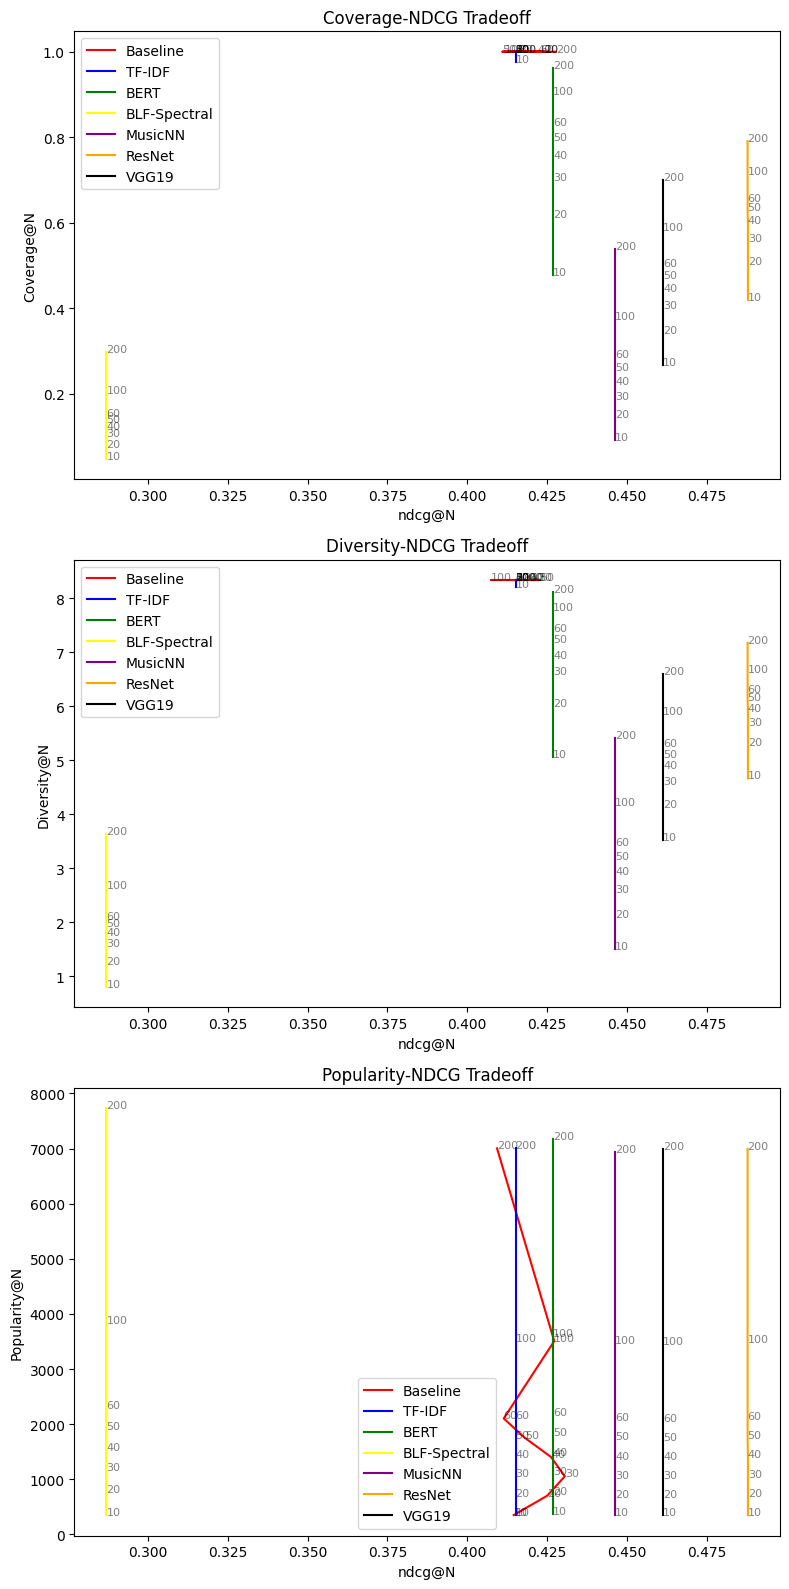

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))
colors = ["red", "blue", "green", "yellow", "purple", "orange", "black"]
yaxis_labels = ["Coverage@N", "Diversity@N", "Popularity@N"]
titles = ["Coverage-NDCG Tradeoff", "Diversity-NDCG Tradeoff", "Popularity-NDCG Tradeoff"]
for (metric, result), ax, yaxislabel in zip(results.items(), axes.flatten(), yaxis_labels):
    ax.set_ylabel(yaxislabel)
    ax.set_xlabel("ndcg@N")
    ax.set_title(titles.pop(0))
    for (ir_method, data), color in zip(result.items(), colors):
        x = [point[3] for point in data.values()]
        y = [point[0] for point in data.values()]
        ax.plot(x, y, label=ir_method, color=color)
        for i, txt in enumerate(data.keys()):
            ax.annotate(f"{txt}", (x[i], y[i]), alpha=0.5, fontsize=8)
        ax.legend()

plt.tight_layout()
plt.savefig("tradeoff.png", dpi=300)
plt.show()

In [10]:
# store the results object

with open("results.json", "w") as f:
    json.dump(results, f)

In [3]:
# load the results object
with open("results.json", "r") as f:
    results = json.load(f)

In [4]:
# for ir_method, data in results["cov"].items():
#     for N, values in data.items():
#         results["cov"][ir_method][N] = [min(1., float(values[0]) * int(N)), float(values[1])]
# for ir_method, data in results["div"].items():
#     for N, values in data.items():
#         results["div"][ir_method][N] = [min(1., float(values[0]) * int(N)), float(values[1])]

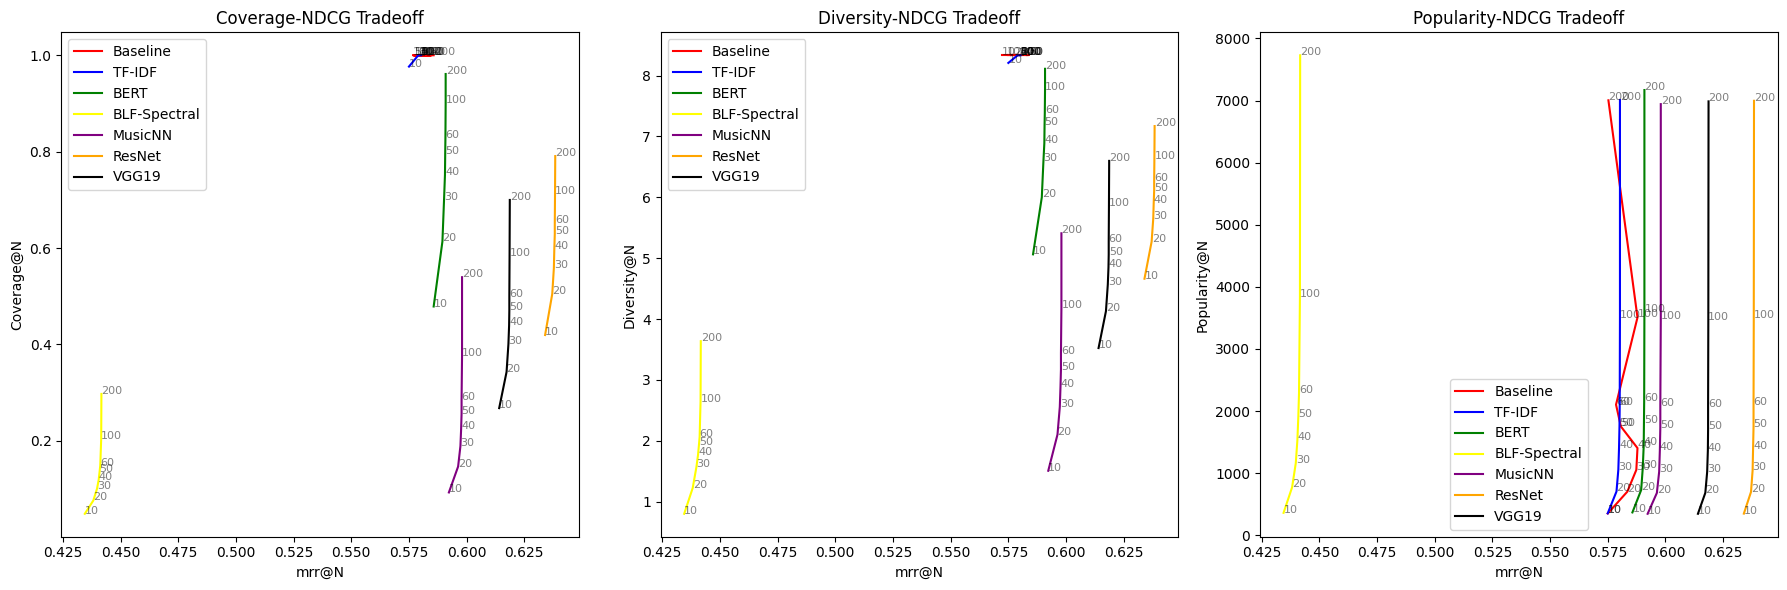

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ["red", "blue", "green", "yellow", "purple", "orange", "black"]
yaxis_labels = ["Coverage@N", "Diversity@N", "Popularity@N"]
idx = 4
xaxis_labels = ["prec@N", "rec@N", "ndcg@N", "mrr@N"]
titles = ["Coverage-NDCG Tradeoff", "Diversity-NDCG Tradeoff", "Popularity-NDCG Tradeoff"]
for (metric, result), ax, yaxislabel in zip(results.items(), axes.flatten(), yaxis_labels):
    ax.set_ylabel(yaxislabel)
    ax.set_xlabel(xaxis_labels[idx-1])
    ax.set_title(titles.pop(0))
    for (ir_method, data), color in zip(result.items(), colors):
        x = [point[idx] for point in data.values()]
        y = [point[0] for point in data.values()]
        ax.plot(x, y, label=ir_method, color=color)
        for i, txt in enumerate(data.keys()):
            ax.annotate(f"{txt}", (x[i], y[i]), alpha=0.5, fontsize=8)
        ax.legend()

plt.tight_layout()
plt.savefig(f"tradeoff_{xaxis_labels[idx-1].split('@')[0]}.png", dpi=300)
plt.show()